In [129]:
import pandas as pd
import numpy as np
from subprocess import call
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import pairwise_distances
from surprise import SVD, Dataset, Reader
from scipy import stats


rating = pd.read_csv("u.data", sep="\t", names = ['user_id', 'item_id', 'rating', 'timestamp'])
rating

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [59]:
rating_matrix1 = rating.pivot_table(index = ['user_id'], columns = ['item_id'], values = ['rating'])
rating_matrix1

rating_matrix = rating_matrix1.dropna(thresh = 10, axis = 1)
rating_matrix = rating_matrix.fillna(0)



'''rating_matrix = rating_matrix.dropna(thresh = 10, axis = 0)
sum(list(rating_matrix.isna().astype(int).sum(axis = 0)))

n_users = rating_matrix.shape[0]
n_movies = rating_matrix.shape[1]
print(n_users, n_movies)
rating_matrix'''
rating_matrix

rating                                               ...            \
item_id   1    2    3    4    5    6    7    8    9    10    ... 1446 1451   
user_id                                                      ...             
1          5.0  3.0  4.0  3.0  3.0  5.0  4.0  1.0  5.0  3.0  ...  0.0  0.0   
2          4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  ...  0.0  0.0   
3          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
5          4.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
939        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  ...  0.0  0.0   
940        0.0  0.0  0.0  2.0  0.0  0.0  4.0  5.0  3.0  0.0  ...  0.0  0.0   
941        5.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0   
942        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
943        0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  0.0  ...  0.0  0.0   

                                                 
item_id 1469 1478 1480 1483 1503 1518 1540 1615  
user_id                                          
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...      ...  ...  ...  ...  ...  ...  ...  ...  
939      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
940      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
941      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
942      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
943      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[943 rows x 1152 columns]

In [168]:
n_users = rating['user_id'].nunique()
n_movies = rating['item_id'].nunique()
Ratings = np.array(rating_matrix)
r = pd.DataFrame(Ratings)
total_possibilities = np.prod(Ratings.shape)
user_activity = np.flatnonzero(Ratings).shape[0]
total_sparsity = 100 * (user_activity / total_possibilities)
print("{}%".format(total_sparsity))
r

9.016823524213503%


,0,1,2,3,4,5,6,7,8,9,...,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


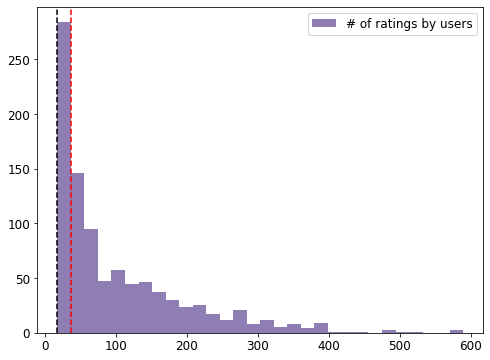

In [149]:
plt.rcParams['figure.figsize'] = 8, 6 
plt.rcParams['font.size'] = 12

plt.hist(np.sum(Ratings != 0, axis = 1), histtype = 'stepfilled', bins = 30,
         alpha = 0.85, label = '# of ratings by users', color = '#7A68A6')
plt.axvline(x = 18, color = 'black', linestyle = '--')
plt.axvline(x = 37, color = 'red', linestyle = '--')
plt.legend(loc = "upper right")
plt.show()

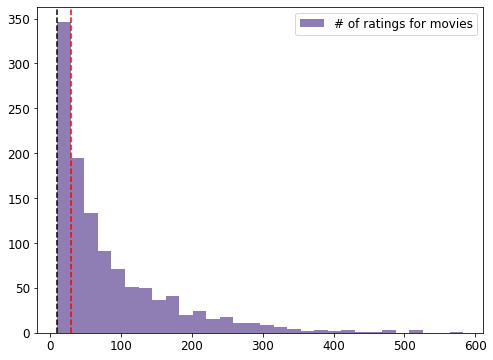

10

In [150]:
plt.rcParams['figure.figsize'] = 8, 6 
plt.rcParams['font.size'] = 12

plt.hist(np.sum(Ratings != 0, axis = 0), histtype = 'stepfilled', bins = 30,
         alpha = 0.85, label = '# of ratings for movies', color = '#7A68A6')
plt.axvline(x = 10, color = 'black', linestyle = '--')
plt.axvline(x = 29, color = 'red', linestyle = '--')
plt.legend(loc = "upper right")
plt.show()

list(np.sum(Ratings != 0, axis=0))[17]

In [6]:
rating["status"] = [1]*rating.shape[0]
Pre_use_preferences1 = rating.pivot_table(index = ['user_id'], columns = ['item_id'], values = ["status"])
Pre_use_preferences1

Pre_use_preferences = Pre_use_preferences1.dropna(thresh = 10, axis = 1)
'''sum(list(Pre_use_preferences.isna().astype(int).sum(axis=1)))'''

Pre_use_preferences = Pre_use_preferences.fillna(0)
Pre_use_preferences

status                                               ...            \
item_id   1    2    3    4    5    6    7    8    9    10    ... 1446 1451   
user_id                                                      ...             
1          1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0   
2          1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
3          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
5          1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
939        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
940        0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  ...  0.0  0.0   
941        1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
942        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
943        0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   

                                                 
item_id 1469 1478 1480 1483 1503 1518 1540 1615  
user_id                                          
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...      ...  ...  ...  ...  ...  ...  ...  ...  
939      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
940      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
941      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
942      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
943      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[943 rows x 1152 columns]

In [7]:
'''Pre_use_preferences_similarities = 1 - pairwise_distances(Pre_use_preferences, metric="cosine")
Pre_use_preferences_similarities'''

'''def percentile(arr):
    arr = list(arr)
    l = len(arr)
    ptile = []
    Sort_arr = sorted(arr)
    for i in arr:
        ptile.append(arr.index(i)/l)
    
    return ptile

Percentile_matrix = []
for i in range(len(Pre_use_preferences_predictions)):
    Percentile_matrix.append(percentile(Pre_use_preferences_predictions[0]))

#for N neighbours
q = list((Pre_use_preferences != 0).astype(int).sum(axis=0))
def nearestNeighbours(user, N=300):
    neighbours = []
    weights = []
    a = pd.DataFrame(Pre_use_preferences.iloc[:, m])
    a = list(a.index[a.iloc[:, 0] != 0])
    c = [Pre_use_preferences_similarities[user][i-1] for i in a]
    arr = list(Pre_use_preferences_similarities[user])
    for i in range(0, N+1):
        p = max(arr)
        q = arr.index(p)
        neighbours.append(q)
        weights.append(p)
        arr[q] = -1
    for i in range(0, N):
        p = max(c)
        q = c.index(p)
        neighbours.append(a[q])
        weights.append(p)
        a[q] = -1
        c[q] = -1
    return neighbours[1:], weights[1:]

a, b = nearestNeighbours(2)

print(a, b)

def filtering():
    p_arr = np.array(Pre_use_preferences)
    for i in range(0, Pre_use_preferences.shape[0]):
        for j in range(0, Pre_use_preferences.shape[1]):
            if p_arr[i][j] == 0:
                numerator = []
                ind, wt = nearestNeighbours(i)
                numerator = [(p_arr[ind[k]-1][j])*float(wt[k]) for k in range(0, len(wt))]
                p_arr[i][j] = sum(numerator)/sum(wt)
    return p_arr

ans = filtering()
ans'''

'def percentile(arr):\n    arr = list(arr)\n    l = len(arr)\n    ptile = []\n    Sort_arr = sorted(arr)\n    for i in arr:\n        ptile.append(arr.index(i)/l)\n    \n    return ptile\n\nPercentile_matrix = []\nfor i in range(len(Pre_use_preferences_predictions)):\n    Percentile_matrix.append(percentile(Pre_use_preferences_predictions[0]))\n\n#for N neighbours\nq = list((Pre_use_preferences != 0).astype(int).sum(axis=0))\ndef nearestNeighbours(user, N=300):\n    neighbours = []\n    weights = []\n    a = pd.DataFrame(Pre_use_preferences.iloc[:, m])\n    a = list(a.index[a.iloc[:, 0] != 0])\n    c = [Pre_use_preferences_similarities[user][i-1] for i in a]\n    arr = list(Pre_use_preferences_similarities[user])\n    for i in range(0, N+1):\n        p = max(arr)\n        q = arr.index(p)\n        neighbours.append(q)\n        weights.append(p)\n        arr[q] = -1\n    for i in range(0, N):\n        p = max(c)\n        q = c.index(p)\n        neighbours.append(a[q])\n        weights.ap

In [8]:
Pre_use = np.array(Pre_use_preferences)
Pre_use

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [9]:
#Creating Training and tesing sets
def split_train_test(r):
    test_set = np.zeros(r.shape)
    train_set = r.copy()
    for i in range(r.shape[0]):
        test_indices = np.random.choice(np.flatnonzero(r[i]), size = 10, replace = False)
        
    train_set[i, test_indices] = 0.0
    test_set[i, test_indices] = r[i, test_indices]
    
    return train_set, test_set

In [10]:
Wt1 = [x/Pre_use.shape[1] for x in np.sum(Pre_use != 0, axis = 1)] 
Wt2 = [x/Pre_use.shape[0] for x in np.sum(Pre_use != 0, axis = 0)]
wu = np.zeros((Pre_use.shape[0], Pre_use.shape[0]))
wi = np.zeros((Pre_use.shape[1], Pre_use.shape[1]))

for i in range(Pre_use.shape[1]):
    if i >= Pre_use.shape[0]:
        wi[i][i] = Wt2[i]
    else:
        wu[i][i] = Wt1[i]
        wi[i][i] = Wt2[i]
print(wu.shape, wi.shape)

Q = np.zeros(Pre_use.shape)
for user in range(Pre_use.shape[0]):
    for item in range(Pre_use.shape[1]):
        Q[user][item] = np.sum(Pre_use[user][item:] != 0)/Pre_use.shape[1]



(943, 943) (1152, 1152)


In [11]:
user_wts = np.sum(Q, axis = 1)
item_wts = np.sum(Q, axis = 0)
item_wts.shape, user_wts.shape

((1152,), (943,))

In [12]:
class Pre_use_Predictions:
    def __init__(self, iters, reg_param, num_features):
        self.iters = iters
        self.reg = reg_param
        self.n_features = num_features
        
    def wALS(self, R, x, y, token):
        #gradient descent of the Objective Function used in Alternating Least Squares
        '''op = R.dot(y)
        M = y.T.dot(y) + (np.eye(self.n_features)*self.reg)
        Minv = np.linalg.inv(M)
        x = op.dot(Minv)
        return x'''
        if token == 1:
            for user in range(R.shape[0]):
                Wu = np.diag(Q[user])
                a = (R[user].dot(Wu)).dot(y)
                Ainv = np.linalg.inv((y.T.dot(Wu)).dot(y) + np.eye(self.n_features)*(self.reg*user_wts[user]))
                x[user] = a.dot(Ainv)
            return x
                
        elif token == 0:    
            for item in range(R.shape[1]):
                Wi = np.diag(Q[:, item])
                a = (R[:, item].T.dot(Wi)).dot(x)
                Ainv = np.linalg.inv(((x.T.dot(Wi)).dot(x)) + (np.eye(self.n_features)*(self.reg*item_wts[item])))
                y[item] = a.dot(Ainv)
            return y
    
    
    def prediction(self):
        pred = self.X.dot(self.Y.T)
        return pred
    
    def calc_mse(self, M, M2):
        indices = np.nonzero(M)
        mse = mean_squared_error(M[indices], M2[indices])
        return mse
    
    def train_model(self, train, test):
        self.n_user , self.n_movies = train.shape
        
        #initialization of user and item matrices before model is trained 
        self.X = np.random.random((self.n_user, self.n_features))
        self.Y = np.random.random((self.n_movies, self.n_features))
        
        self.test_mse = []
        self.train_mse = []
        for q in range(self.iters):
            self.X = self.wALS(train, self.X, self.Y, 1)
            self.Y = self.wALS(train, self.X, self.Y, 0)
            p = self.prediction()
            self.test_mse.append(self.calc_mse(test, p))
            self.train_mse.append(self.calc_mse(train, p))
            
        return p
    @staticmethod
    def plot_learning_curve(model):
        linewidth = 3
        plt.plot(model.test_mse, label = 'Test', linewidth = linewidth)
        plt.plot(model.train_mse, label = 'Train', linewidth = linewidth)
        plt.xlabel('num of iterations')
        plt.ylabel('MSE val')
        plt.legend(loc = 'best')
            
            



In [13]:
def cv_train_test(r):
    test_set = np.zeros(r.shape)
    train_set = r.copy()
    for i in range(r.shape[0]):
        test_indices = np.random.choice(np.flatnonzero(r[i]), size = 10, replace = False)
        
    train_set[i, test_indices] = 0.0
    test_set[i, test_indices] = r[i, test_indices]
    
    return train_set, test_set

In [27]:
'''alpha = [0.001, 0.01, 0.02]
features = [5, 10, 18, 25, 30, 35]
params = []
its_train = []
its_test = []

for i in alpha:
    for j in features:
        cycle_outcomes_train = []
        cycle_outcomes_test = []
        for cycles in range(10):
            training_set, test_set  = cv_train_test(Pre_use)
            filtering = Pre_use_Predictions(iters = 40, num_features = j, reg_param=i)
            P_hat = filtering.train_model(training_set, test_set)
            cycle_outcomes_train.append(filtering.train_mse[:])
            cycle_outcomes_test.append(filtering.test_mse[:])
        its_train.append(np.sum(np.array(cycle_outcomes_train), axis = 0)/10)
        its_test.append(np.sum(np.array(cycle_outcomes_test), axis = 0)/10)
        params.append([40, j, i])
        #its_train.append(filtering.train_mse)
        #its_test.append(filtering.test_mse)'''
        
'''for i in [10, 20, 30, 40]:
    cycle_outcomes_train = []
    cycle_outcomes_test = []
    for cycles in range(10):
        training_set, test_set  = cv_train_test(Pre_use)
        filtering = Pre_use_Predictions(iters = i, num_features = 30, reg_param=0.001)
        P_hat = filtering.train_model(training_set, test_set)
        cycle_outcomes_train.append(filtering.train_mse[:])
        cycle_outcomes_test.append(filtering.test_mse[:])
    its_train.append(np.sum(np.array(cycle_outcomes_train), axis = 0)/10)
    its_test.append(np.sum(np.array(cycle_outcomes_test), axis = 0)/10)
    params.append([i, 30, 0.001])
    #its_train.append(filtering.train_mse)
    #its_test.append(filtering.test_mse)'''


def Cross_Validation_Build(iters, features, reg, k = 10):
    its_train = []
    its_test = []
    cycle_outcomes_train = []
    cycle_outcomes_test = []
    for cycles in range(k):
        training_set, test_set  = cv_train_test(Pre_use)
        filtering = Pre_use_Predictions(iters = 20, num_features = 30, reg_param=0.001)
        P_hat = filtering.train_model(training_set, test_set)
        cycle_outcomes_train.append(filtering.train_mse[:])
        cycle_outcomes_test.append(filtering.test_mse[:])
    its_train.append(np.sum(np.array(cycle_outcomes_train), axis = 0)/10)
    its_test.append(np.sum(np.array(cycle_outcomes_test), axis = 0)/10)
    return P_hat, its_train, its_test
        #its_train.append(filtering.train_mse)
        #its_test.append(filtering.test_mse)



In [14]:
print(its_train, its_test)
len(its_train)

NameError: name 'its_train' is not defined

In [15]:
indu = 0
print(params)
print(min(its_test[0]))
print(list(its_test[0]).index(min(its_test[0])))

linewidth = 2
plt.plot(its_test[0], label = 'Test', linewidth = linewidth)
plt.plot(its_train[0], label = 'Train', linewidth = linewidth)
plt.xlabel('num of iterations')
plt.ylabel('MSE val')
plt.legend(loc = 'best')


NameError: name 'params' is not defined

In [28]:
training_set, test_set = split_train_test(Pre_use)

P_hat, train_errs, test_errs = Cross_Validation_Build(k = 10, iters = 6, features = 30, reg = 0.001)

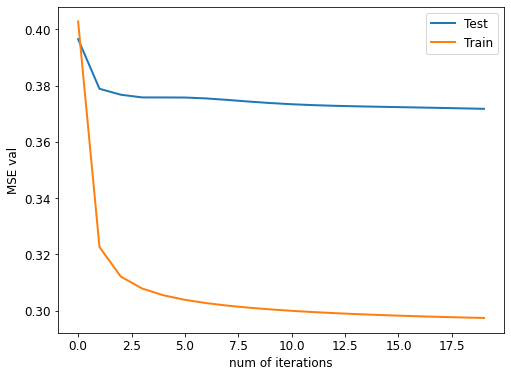

In [36]:
linewidth = 2
plt.plot(test_errs[0], label = 'Test', linewidth = linewidth)
plt.plot(train_errs[0], label = 'Train', linewidth = linewidth)
plt.xlabel('num of iterations')
plt.ylabel('MSE val')
plt.legend(loc = 'best')


In [37]:
min(train_errs[0])

0.2973677611392215

In [38]:
for i in range(Pre_use.shape[0]):
    for j in range(Pre_use.shape[1]):
        if Pre_use[i][j] == 1:
            P_hat[i][j] = Pre_use[i][j]
            
P_hat

array([[ 1.        ,  1.        ,  1.        , ...,  0.40311531,
         1.07716337,  0.62078196],
       [ 1.        ,  0.11612998,  0.06845241, ...,  0.43739772,
        -0.05251442,  0.3857085 ],
       [ 0.09803304, -0.08362847,  0.02349628, ...,  0.43270753,
         0.22629105,  0.46163878],
       ...,
       [ 1.        ,  0.02334311,  0.1017464 , ..., -0.00618088,
        -0.12827494,  0.45056398],
       [ 0.206955  ,  0.10286764, -0.12178197, ..., -0.44062407,
         0.53651466,  0.06293834],
       [ 0.51659234,  1.        ,  0.14448889, ...,  0.1293922 ,
         0.75710093, -0.20299493]])

In [86]:
pd.DataFrame(P_hat).to_csv("Pre_use_Predictions.csv")

In [127]:
ffff = np.sum(P_hat[392])/1152 + np.min(P_hat[392])
np.sum(P_hat[392])/1152, np.min(P_hat[392]), ffff


(0.435589080218917, -1.4660009797964806, -1.0304118995775635)

In [169]:
theta = 50
for i in range(Ratings.shape[0]):
    low = np.percentile(P_hat[i], theta)
    vui = np.sum(Ratings[i])/np.sum(Ratings[i] != 0)
    for j in range(Ratings.shape[1]):
        if P_hat[i][j] <= low:
            delta = (stats.percentileofscore(P_hat[i], P_hat[i][j], 'rank') * 1.5)/100
            Ratings[i][j] = vui*delta

    

In [176]:
pd.DataFrame(Ratings).to_csv("Augmented_Matrix.csv")